# Importing necessary library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [4]:
#checking the shape of an datasets
df.shape

(891, 12)

# Data Preprocessing

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#dropping the unknown column
df = df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [7]:
df.describe() #show the statistical definition

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#checking the dtype
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
#checking the unique value count
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [10]:
#checking the null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# Refining the data

In [11]:
#replacing the missing values
df['Age'] = df['Age'].replace(np.nan, df['Age'].median(axis = 0))
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

In [12]:
#type casting age to integer
df['Age'] = df['Age'].astype('int')

In [13]:
#replacing male with 1 and female with 0
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100)

In [14]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
df['Age'] = pd.cut(x=df['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

# Exploratory data analysis

# Plotting the Countplot to visualize the numbers

<AxesSubplot:xlabel='Parch', ylabel='count'>

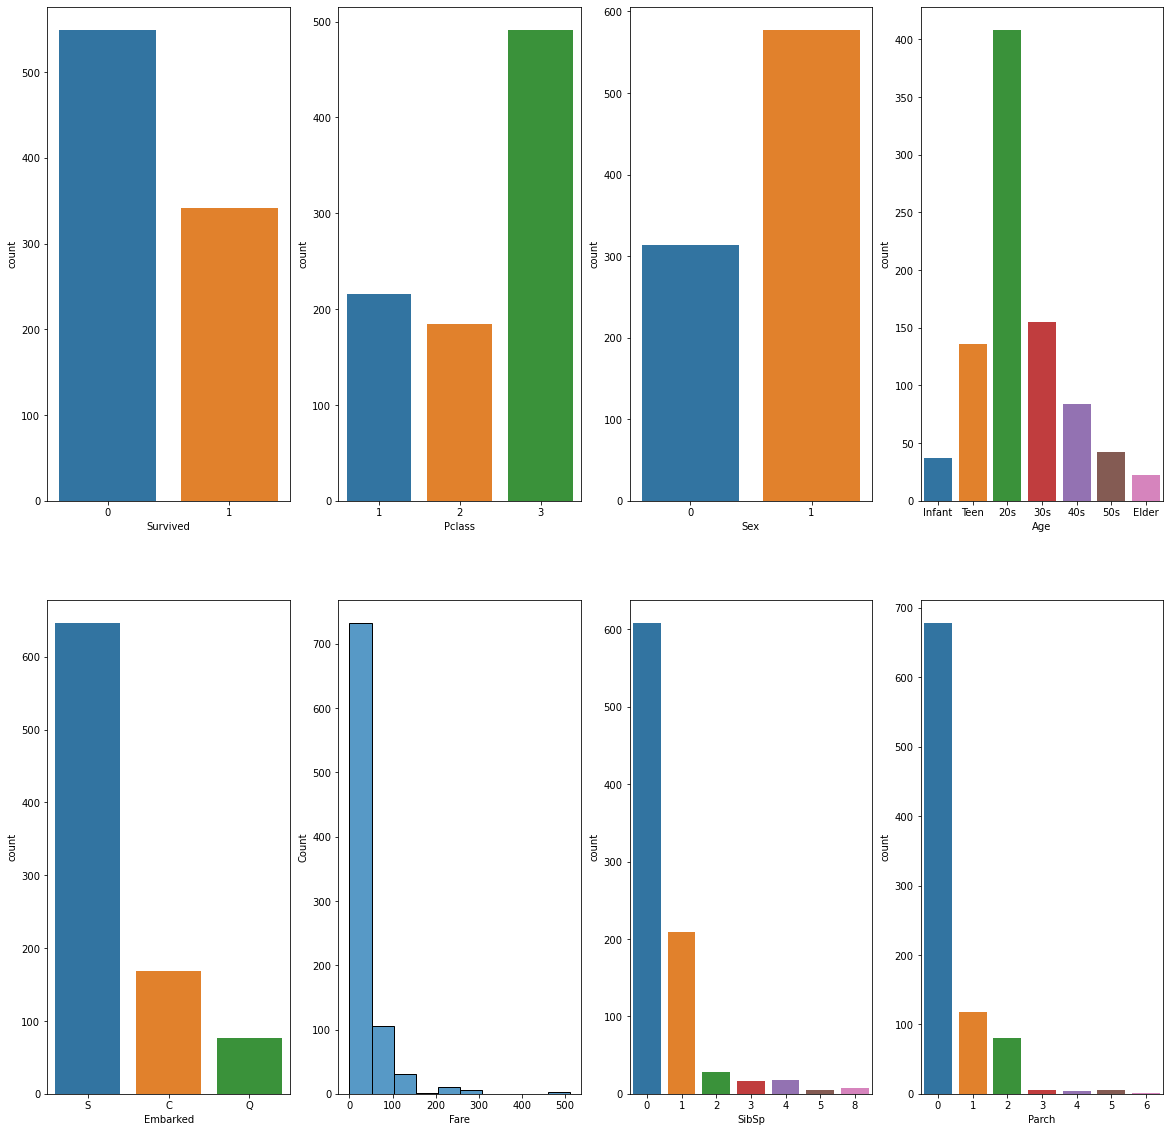

In [15]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2])
sns.countplot(x = 'Parch', data = df, ax=ax[1,3])

# Visualizing the replationship between the features

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

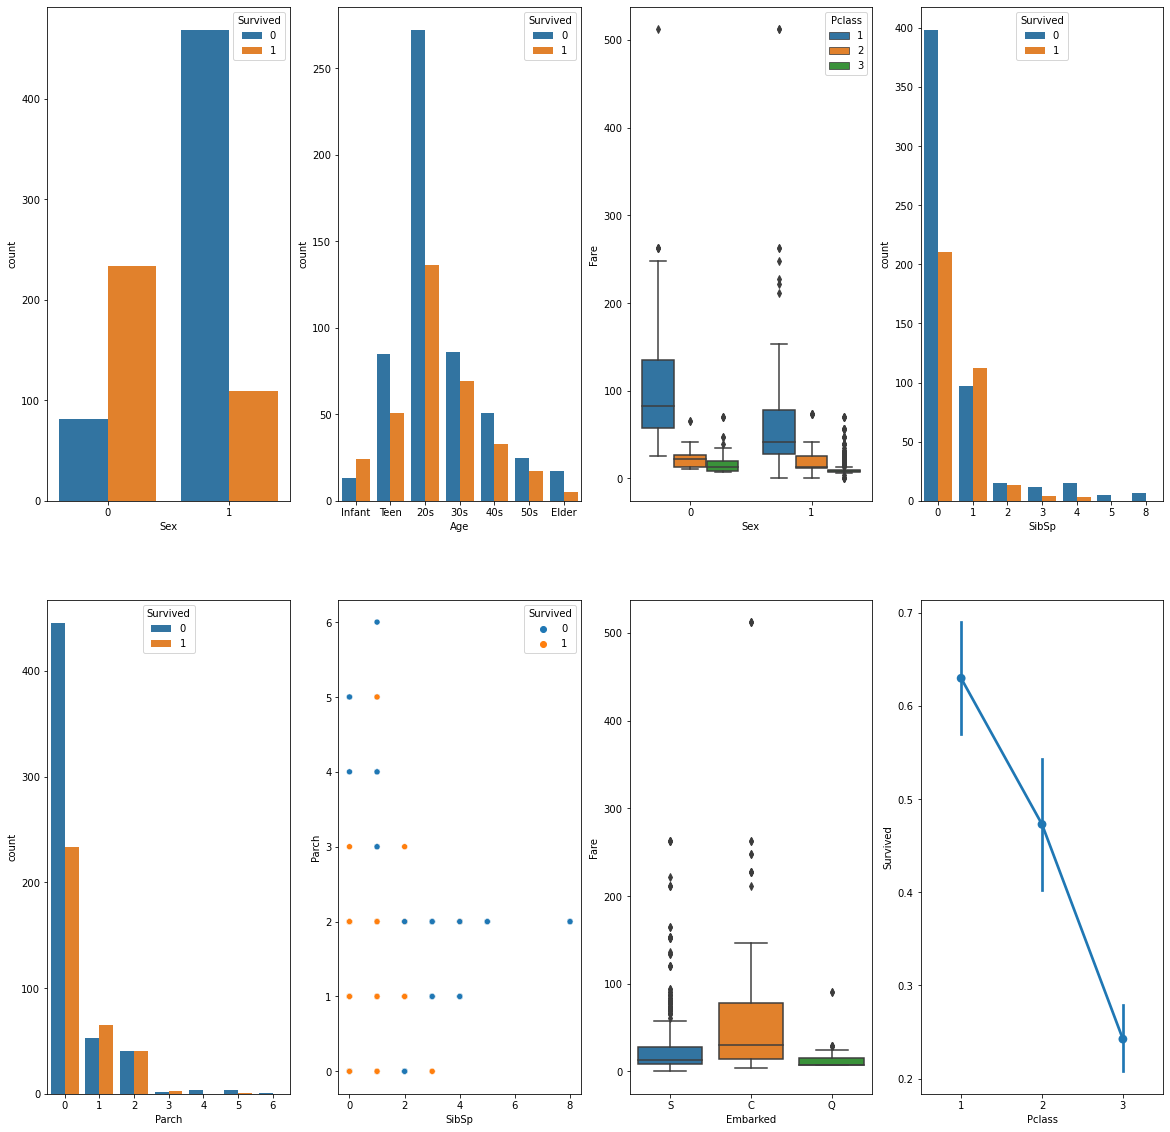

In [16]:

fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

# Data Preprocessing 2

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['S', 'C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [18]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

# Coorelation Heatmap

<AxesSubplot:>

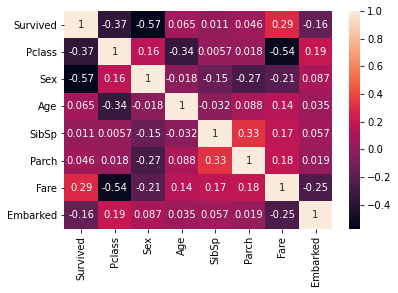

In [19]:
sns.heatmap(df.corr(), annot = True)

# Seperating the target and independent variable

In [21]:
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

# Model traning

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [24]:
import warnings
warnings.filterwarnings("ignore")
lr.fit(x,y)
lr.score(x,y)

0.818577648766328

# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [26]:
dtree.fit(x,y)
dtree.score(x,y)

0.9404934687953556